# Intro To Image Classification using Keras

**Keras** is a minimalisitc Python Deep Learning library that works on top of TensorFlow or Theano. It helps to quickly prototype Deep Learning models, and works seamlessly with both CPUs and GPUs. (You don't need to worry about scoping your variables for a CPU and GPU!) 

Documentation for Keras is available here: https://keras.io/

The Keras community is very active. I encourage you to reach out if you have any questions on the Slack channel "keras.io" or the Gitter channel "keras".


# The MNIST Dataset

We are going to use the **MNIST** dataset (which contains scanned, handwritten digits from 0-9) for this demo. Here's why:

1) The images are normalized in size, and centered. Not much pre-processing is required.

2) The dataset is small enough to be trained on a CPU.

3) The dataset is the "Hello World" of Image Processing. 
 

Citations:

For this tutorial I am referring to content from:

1) **Andrej Karpathy's Standford Computer Vison Course** http://cs231n.github.io/

2) **Adam Getigey's blog, Machine Learning is Fun!** https://medium.com/@ageitgey/

3) **The Keras repository of examples** https://github.com/fchollet/keras/blob/master/examples/

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import matplotlib as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt

ImportError: No module named keras

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[20], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[42], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[54], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

NameError: name 'plt' is not defined

In [4]:
# Lets take a look at shape of Images
print(X_train.shape)


NameError: name 'X_train' is not defined

In [5]:
import pandas as pd

In [6]:
pd_image = pd.DataFrame([list(l) for l in X_train[0]])
pd_image

0   1   2   3    4    5    6    7    8    9  ...   18   19   20   21   22  \
0    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
1    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
2    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
3    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
4    0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
5    0   0   0   0    0    0    0    0    0    0 ...  175   26  166  255  247   
6    0   0   0   0    0    0    0    0   30   36 ...  225  172  253  242  195   
7    0   0   0   0    0    0    0   49  238  253 ...   93   82   82   56   39   
8    0   0   0   0    0    0    0   18  219  253 ...    0    0    0    0    0   
9    0   0   0   0    0    0    0    0   80  156 ...    0    0    0    0    0   
10   0   0   0   0    0    0    0    0    0   14 ...    0    0    0    0    0   
11   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
12   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
13   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
14   0   0   0   0    0    0    0    0    0    0 ...   25    0    0    0    0   
15   0   0   0   0    0    0    0    0    0    0 ...  150   27    0    0    0   
16   0   0   0   0    0    0    0    0    0    0 ...  253  187    0    0    0   
17   0   0   0   0    0    0    0    0    0    0 ...  253  249   64    0    0   
18   0   0   0   0    0    0    0    0    0    0 ...  253  207    2    0    0   
19   0   0   0   0    0    0    0    0    0    0 ...  250  182    0    0    0   
20   0   0   0   0    0    0    0    0    0    0 ...   78    0    0    0    0   
21   0   0   0   0    0    0    0    0   23   66 ...    0    0    0    0    0   
22   0   0   0   0    0    0   18  171  219  253 ...    0    0    0    0    0   
23   0   0   0   0   55  172  226  253  253  253 ...    0    0    0    0    0   
24   0   0   0   0  136  253  253  253  212  135 ...    0    0    0    0    0   
25   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
26   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   
27   0   0   0   0    0    0    0    0    0    0 ...    0    0    0    0    0   

     23  24  25  26  27  
0     0   0   0   0   0  
1     0   0   0   0   0  
2     0   0   0   0   0  
3     0   0   0   0   0  
4     0   0   0   0   0  
5   127   0   0   0   0  
6    64   0   0   0   0  
7     0   0   0   0   0  
8     0   0   0   0   0  
9     0   0   0   0   0  
10    0   0   0   0   0  
11    0   0   0   0   0  
12    0   0   0   0   0  
13    0   0   0   0   0  
14    0   0   0   0   0  
15    0   0   0   0   0  
16    0   0   0   0   0  
17    0   0   0   0   0  
18    0   0   0   0   0  
19    0   0   0   0   0  
20    0   0   0   0   0  
21    0   0   0   0   0  
22    0   0   0   0   0  
23    0   0   0   0   0  
24    0   0   0   0   0  
25    0   0   0   0   0  
26    0   0   0   0   0  
27    0   0   0   0   0  

[28 rows x 28 columns]

# A Fully Connected Network

Let's first build a **fully connected model** to use as a benchmark.

In [7]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

To those who are in relationships or are married, use a **seed** value to remember anniversary dates - it's very important :). 

I specifically use this to remember my marriage date so I will never forget it.

Jokes apart, set a **seed** value if you want reproducibility in your results.


In [8]:
seed = 10212010
numpy.random.seed(seed)

In [9]:
print(X_train.shape)


(60000, 28, 28)


In [10]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]


In [11]:
#Flatten it to be fed as input into Dense Layer
X_train_flatten = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_flatten = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [12]:
# normalize inputs from 0-255 to 0-1. This is for optimizer to converge faster. 
X_train_flatten = X_train_flatten / 255
X_test_flatten = X_test_flatten / 255

In [13]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [14]:
fullyconnected_model = Sequential()


A **Dense Layer** takes a few parameters as input. I will try to explain them below:

**output_dim**: The output dimension of the Dense Layer. In this case, I am using 512. You can think of this as the number of neurons in a layer. 

**init**: The initialization function for the weights of the layer.

**activation**: The activation function to be used in the layer. A few options are: relu, tanh, sigmoid, linear, softmax. See https://keras.io/activations/ for more details.

**input_dim**: The shape of the input array. In this case, it will be 784 (28 * 28).


In [15]:
#Dense Layer 1
fullyconnected_model.add(Dense(512, input_dim=num_pixels, init='normal', activation='relu', name='main_input'))


Dense Layer 2 is the output Layer. Hence **Softmax** is used as activation function. 

In [16]:
#Dense Layer 2
fullyconnected_model.add(Dense(num_classes, init='normal', activation='softmax'))


A Keras model needs to be compiled. 

A **Loss** funciton is an error metric to be minimized. There are a few metrics available in Keras, like the mean_squared_error, mean_absolute_precentage_error, hinge, categorical cross entropy. See https://keras.io/metrics/ for more details. We are going to use the categorical cross entropy since this is a multi-class classification problem. 

There are also **Optimizers** available in Keras. We are using the Adam in  this example.




In [17]:
# Compile model
fullyconnected_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Keras uses scikit-learn style methods to perform training and inference.  

A **Fit** function takes the following parameters as input: training dataset, training labels, validation_data (should be a tuple with validation data and labels), number of epochs, batchsize (number of samples per gradient update), and verbosity (0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch).


In [18]:
fullyconnected_model.fit(X_train_flatten, y_train, validation_data=(X_test_flatten, y_test), nb_epoch=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
1s - loss: 0.3253 - acc: 0.9095 - val_loss: 0.1666 - val_acc: 0.9516
Epoch 2/10
1s - loss: 0.1309 - acc: 0.9621 - val_loss: 0.1068 - val_acc: 0.9684
Epoch 3/10
1s - loss: 0.0861 - acc: 0.9751 - val_loss: 0.0834 - val_acc: 0.9738
Epoch 4/10
1s - loss: 0.0608 - acc: 0.9829 - val_loss: 0.0758 - val_acc: 0.9764
Epoch 5/10
1s - loss: 0.0461 - acc: 0.9870 - val_loss: 0.0693 - val_acc: 0.9777
Epoch 6/10
0s - loss: 0.0344 - acc: 0.9908 - val_loss: 0.0627 - val_acc: 0.9796
Epoch 7/10
1s - loss: 0.0264 - acc: 0.9937 - val_loss: 0.0593 - val_acc: 0.9816
Epoch 8/10
1s - loss: 0.0212 - acc: 0.9948 - val_loss: 0.0595 - val_acc: 0.9809
Epoch 9/10
1s - loss: 0.0158 - acc: 0.9963 - val_loss: 0.0700 - val_acc: 0.9783
Epoch 10/10
1s - loss: 0.0125 - acc: 0.9974 - val_loss: 0.0599 - val_acc: 0.9810


# A Convolutional Neural Network

Now that we have created a benchmark, we turn to **CNNs** to build our classifier.

Most of the innovations that have happened in computer vision in the past few years are due to using **CNNs** for Image Processing. 


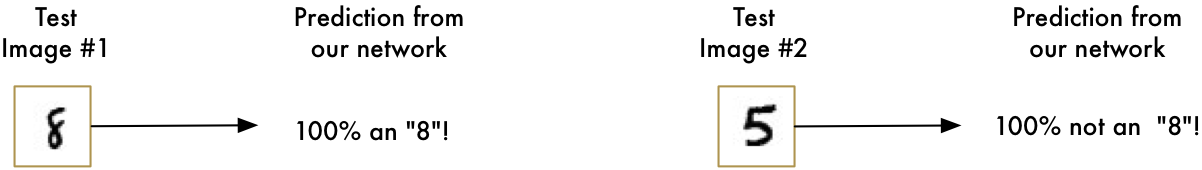

In [19]:
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='FeedForward Image.png')


If flattening and feeding images to a Fully Connected Neural Network actually worked for the above images, then why do we need another type of Neural Network?


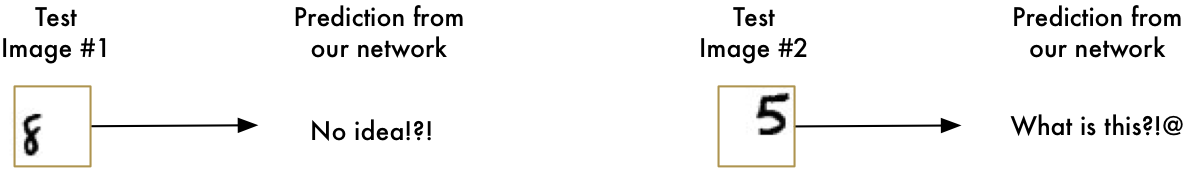

In [20]:
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='Image_Different_places.png')


### Translation Invariance

A Fully Connected Neural Network doesn't understand that moving an object in a picture doesn't make it different. We need to give a Neural Network **Translation Invariance**. 

Convolution is the way to do this. It can be achieved in 4 steps.

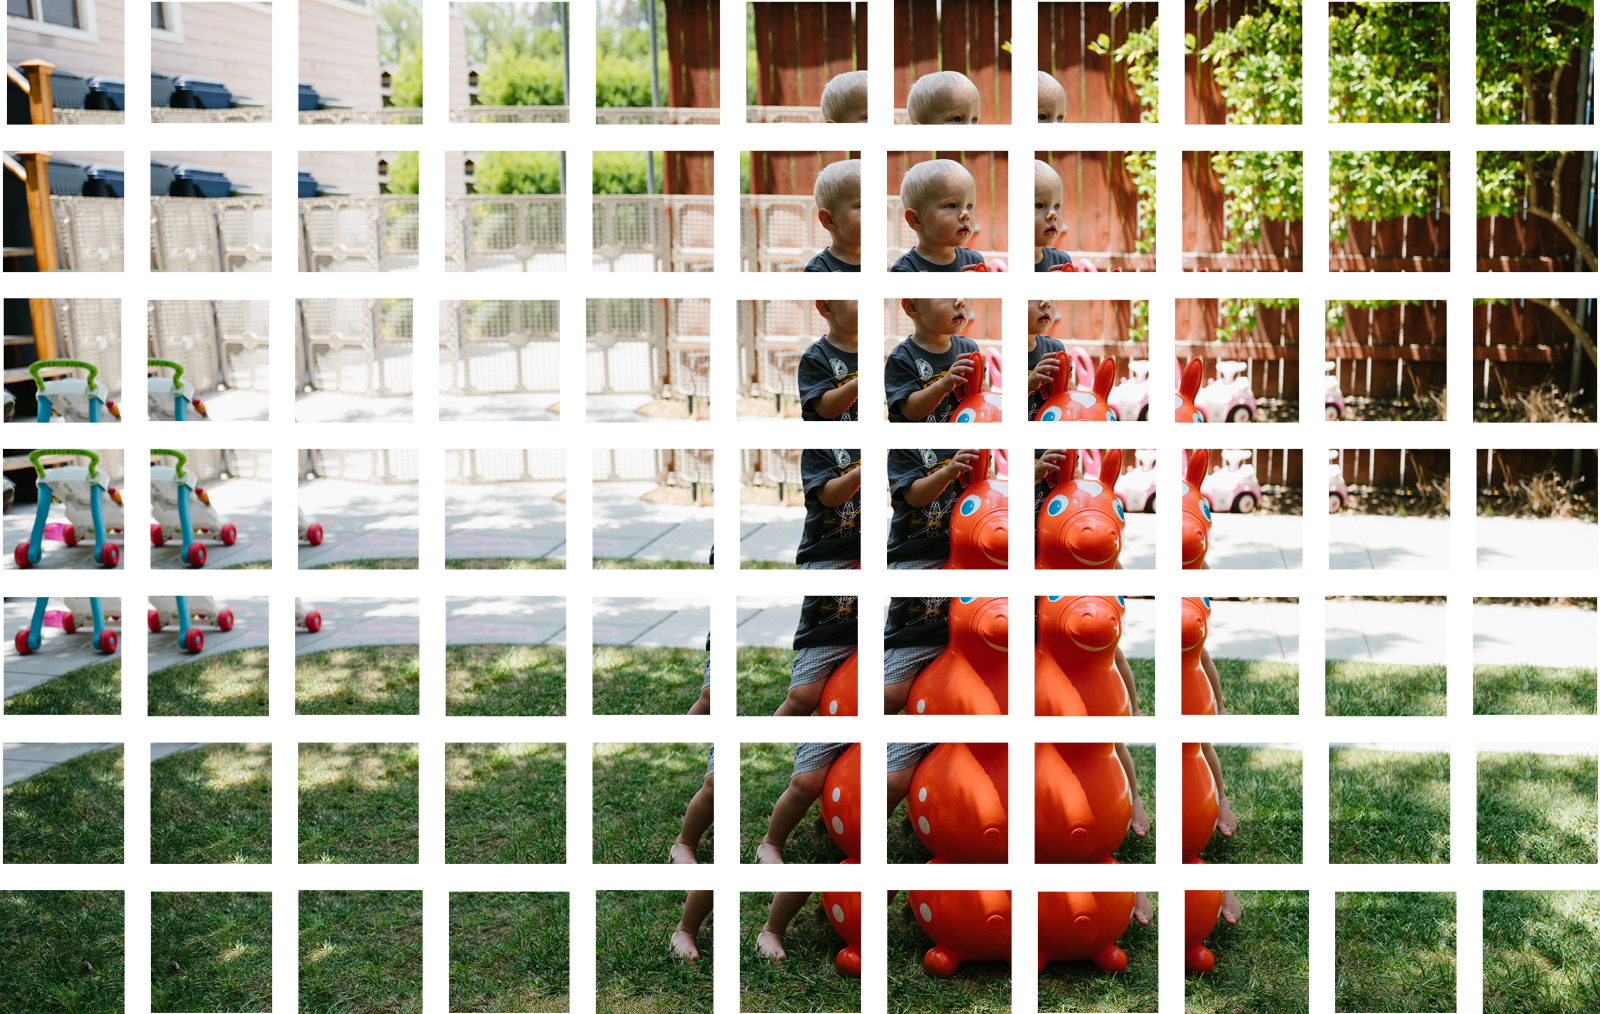

In [21]:
# Step1 Break Image into overlapping Image tiles and pass sliding window on the entire Image
# Save each result as a separate, tiny picture tile
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='tiled_image.png')


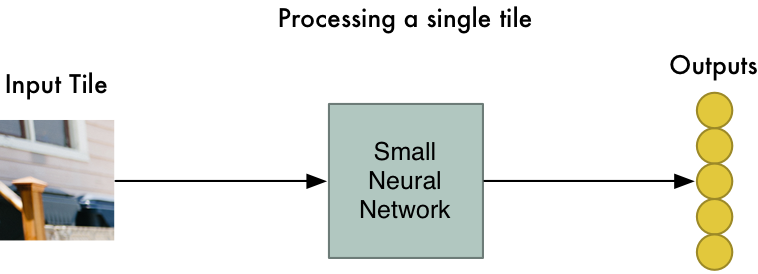

In [22]:
# Step2 Feed each image tile into a small neural network. In Feed Forward Neural Network
# Entire Image was fed into one neural network. In this approach we will do it for every image tile
# Weights/Gradients will be shared for every single tile in the Image.
#Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='single_tile_image.png')

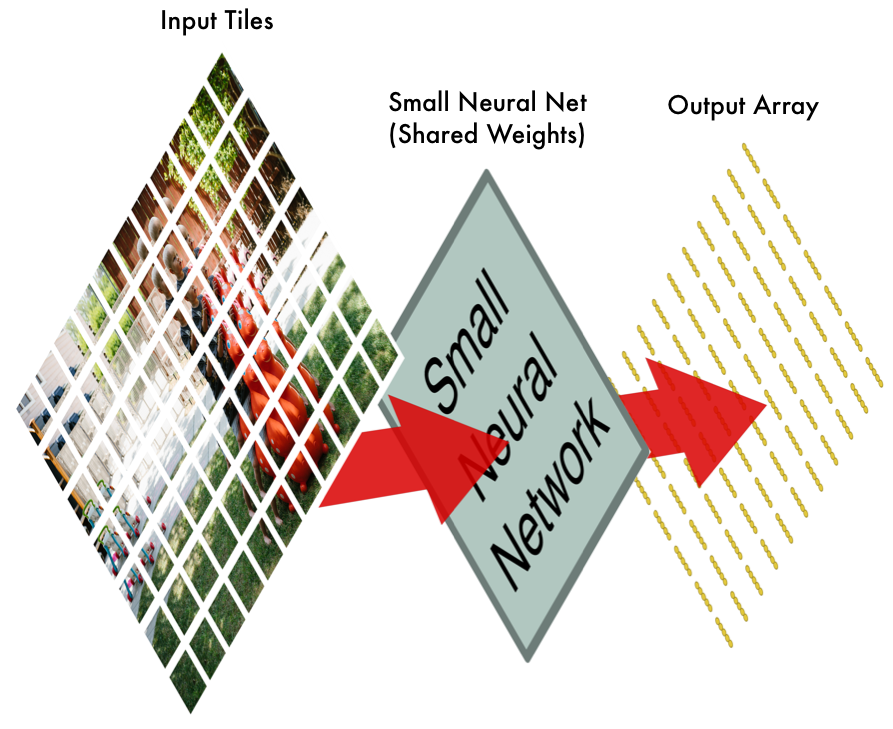

In [23]:
# Step3 Save Results from each tile into a new Array
# We don't want to lose track of the arrangement of the original tiles. So we save result from 
# processing tile into same grid arrangement
# Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='output_array.png')

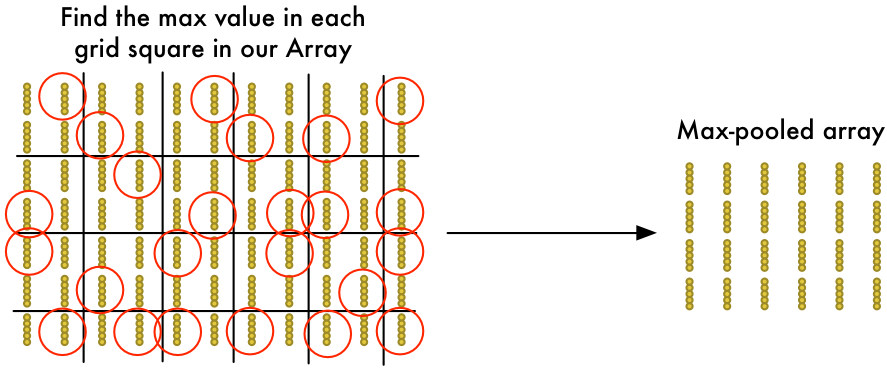

In [24]:
# Step4 Reduce the Size of output array by doing downsampling
# Maxpooling is used for downsampling. 
# You look at a 2x2 square of the array and keep the biggest number
# Image from Adam Geitgey's blog
from IPython.display import Image
Image(filename='max_pooling.png')

In [25]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


(**A Note:** Image ordering is different in Tensorflow and Theano. 
Theano uses nb_sample, channels, height, width.
Tensorflow uses nb_sample, height, width, channels
If your model doesn't converge, then check image_dim_ordering.) 

In [26]:
K.set_image_dim_ordering('tf')

Since our images are gray scale and the conv2D operation needs a 4D tensor as input (samples, rows, cols, channel), we need to reshape  our input data.

In [28]:
batch_size = 200
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [29]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols , 1).astype('float32')

In [30]:
X_train.shape

(60000, 28, 28, 1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

In [32]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


Convolution operator for filtering windows of two-dimensional inputs. 


In [33]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1], border_mode='valid', input_shape=(img_rows, img_cols, 1)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=pool_size))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(num_classes))
cnn_model.add(Activation('softmax'))


In [34]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=1, batch_size=batch_size, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
2s - loss: 0.2689 - acc: 0.9238 - val_loss: 0.0981 - val_acc: 0.9702


**Just a single epoch of training produces a significant increase in accuracy!**

Finally, let's visualize our model:

### MNIST DataSet is all pre-processed and cleaned up for feeding into Deep Learning model. Real life cases data is not always this way. So having data pre-processing skills are very important. OpenCV is a good package for image pre-processing. Refer to this link for more details on how Image Pre-Processing can be done

https://github.com/parambharat/sdcnd_helpers/blob/master/image_processing/Image_processing_tutorial.ipynb



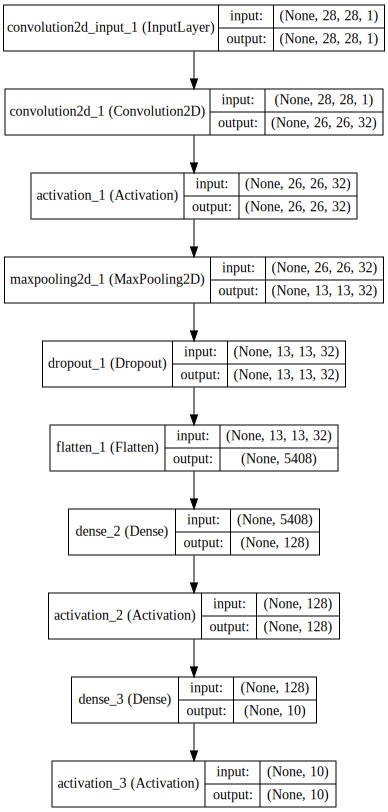

In [37]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(cnn_model, show_shapes=True).create(prog='dot', format='svg'))